In [33]:
import hashlib
import itertools
import json
import os
from six.moves import urllib
import sys

from PIL import Image, ImageColor, ImageFont, ImageDraw, ImageFilter
import random

def LetterRange(start, end):
    return list(map(chr, range(ord(start), ord(end) + 1)))

VOCAB = LetterRange('a', 'z') + LetterRange('A', 'Z') + LetterRange('0', '9')
file_ids = [''.join(i) for i in itertools.product(VOCAB, repeat=3)]
file_index = {f: i for (i, f) in enumerate(file_ids)}

In [35]:
#############
import matplotlib.pyplot as plt
import matplotlib.image as mimg

In [12]:
class AttrDict(dict):
    __getattr__ = dict.__getitem__
    __setattr__ = dict.__setitem__

In [13]:
def defice_cfg_text_gen():
    cfg = AttrDict()

In [243]:
FONTS = '/home/antares/src/ocr_stuff/TextRecognitionDataGenerator/TextRecognitionDataGenerator/fonts/latin/'
BGS = '/home/antares/src/ocr_stuff/TextRecognitionDataGenerator/TextRecognitionDataGenerator/pictures/'

fonts = [os.path.join(FONTS, font) for font in\
         os.listdir(FONTS)]

bgs = [os.path.join(BGS, bg) for bg in\
         os.listdir(BGS)]

In [301]:
def defice_cfg_text_gen():
    cfg = AttrDict()
    cfg.fonts = fonts
    cfg.dict = lines
    cfg.bgs = bgs
    cfg.fs = [n for n in range(15,50,3)]
    return cfg

kernel = np.ones((5,5),np.float32)/25

In [302]:
cfg_gen = defice_cfg_text_gen()

In [306]:
def generate_horizontal_text(text, font, text_color, font_size, space_width):
        image_font = ImageFont.truetype(font=font, size=font_size)
        
        words = text.split(' ')
        
        space_width = image_font.getsize(' ')[0] * space_width

        words_width = [image_font.getsize(w)[0] for w in words]
        text_width =  sum(words_width) + int(space_width) * (len(words) - 1) + 2
        text_height = max([image_font.getsize(w)[1] for w in words]) + 2

        roll = np.random.random()
        if roll > 0.77:
            txt_img = Image.open(random.choice(cfg_gen.bgs))
            h, w = txt_img.size
            xs, ys = np.random.randint(h-text_width), np.random.randint(w-text_height)
            txt_img = txt_img.crop((xs, ys, xs+text_width, ys+text_height))
        else:
            txt_img = Image.new('RGBA', (text_width, text_height), (0, 0, 0, 0))
        # print(txt_img.size)

        txt_draw = ImageDraw.Draw(txt_img)

        colors = [ImageColor.getrgb(c) for c in text_color.split(',')]
        c1, c2 = colors[0], colors[-1]

        fill = (
            random.randint(c1[0], c2[0]),
            random.randint(c1[1], c2[1]),
            random.randint(c1[2], c2[2])
        )

        for i, w in enumerate(words):
            txt_draw.text((sum(words_width[0:i]) + i * int(space_width), 0), w, fill=fill, font=image_font)

        return txt_img

In [304]:
images = []
for idx, word in enumerate(d[20000:21000]):
    roll = np.random.random()
    font = random.choice(cfg_gen.fonts)
    fs = random.choice(cfg_gen.fs)
    text = d[idx]
    if len(text) > 13:
        text = text[:13]
    img = generate_horizontal_text(text,
                                   font=font,
                                   font_size=fs,
                                   space_width=1.3,
                                   text_color='black')
    if roll > 0.5:
        img = cv2.filter2D(np.array(img), -1, kernel)
    images.append(img)

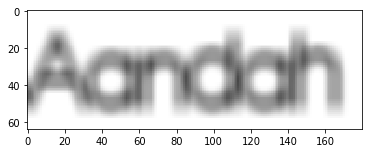

In [308]:
plt.imshow(cv2.resize(np.array(images[99]), (180, 64)))

In [61]:
random.choice(cfg_gen.fonts)

'/home/antares/src/ocr_stuff/TextRecognitionDataGenerator/TextRecognitionDataGenerator/fonts/latin/CaviarDreams_Italic.ttf'

In [175]:
with open('/home/antares/src/ocr_stuff/TextRecognitionDataGenerator/TextRecognitionDataGenerator/dicts/en.txt', 'r') as f:
        d = f.readlines()
d = [l[:-2] for l in d]
d = d[1:]

In [176]:
d[:10]

['108',
 '&',
 '10-poin',
 '10t',
 '11-poin',
 '12-poin',
 '16-poin',
 '18-poin',
 '1s',
 '2,4,5-']

In [179]:
len(d)

466478